In [113]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from statistics import mean

In [99]:
prem_data = pd.read_csv("/Users/kabirparekh/Documents/Coding/Competitive-Soccer-Leagues-master/generatedDataset/premierLeague.csv")

In [100]:
prem_data = prem_data.drop(['Unnamed: 0'], axis=1)

,TeamName,points,TotalWins,TotalDraws,TotalLosses,season,GoalsScored,GoalsConceded,GoalDifference,YellowCard,RedCard,totalFouls
0,Man City,100,32,4,2,1718,106,27,79,58,2,344
1,Man City,98,32,2,4,1819,95,23,72,44,1,328
2,Liverpool,97,30,7,1,1819,89,22,67,37,2,315
3,Chelsea,93,30,3,5,1617,85,33,52,72,0,394
4,Chelsea,87,26,9,3,1415,73,32,41,77,4,382
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Middlesbrough,28,5,13,20,1617,27,53,-26,76,1,478
96,Fulham,26,7,5,26,1819,34,81,-47,68,2,423
97,Sunderland,24,6,6,26,1617,29,69,-40,76,4,437
98,Aston Villa,17,3,8,27,1516,27,76,-49,75,3,431


In [107]:
prem_data_15 = prem_data[prem_data['season'] == 1415].sort_values(by = ['points', 'GoalDifference'], ascending = False)
prem_data_16 = prem_data[prem_data['season'] == 1516].sort_values(by = ['points', 'GoalDifference'], ascending = False)
prem_data_17 = prem_data[prem_data['season'] == 1617].sort_values(by = ['points', 'GoalDifference'], ascending = False)
prem_data_18 = prem_data[prem_data['season'] == 1718].sort_values(by = ['points', 'GoalDifference'], ascending = False)
prem_data_19 = prem_data[prem_data['season'] == 1819].sort_values(by = ['points', 'GoalDifference'], ascending = False)
seasons = [prem_data_15, prem_data_16, prem_data_17, prem_data_18,prem_data_19]

In [131]:
avg_draws = [round(mean(list(prem_data_15['TotalDraws']))/38, 2), round(mean(list(prem_data_16['TotalDraws']))/38, 2), round(mean(list(prem_data_17['TotalDraws']))/38, 2), round(mean(list(prem_data_18['TotalDraws']))/38, 2), round(mean(list(prem_data_15['TotalDraws']))/38, 2)]
avg_wins = [round(mean(list(prem_data_15['TotalWins']))/38, 2), round(mean(list(prem_data_16['TotalWins']))/38, 2), round(mean(list(prem_data_17['TotalWins']))/38, 2), round(mean(list(prem_data_18['TotalWins']))/38, 2), round(mean(list(prem_data_15['TotalWins']))/38, 2)]
avg_losses = [round(mean(list(prem_data_15['TotalLosses']))/38, 2), round(mean(list(prem_data_16['TotalLosses']))/38, 2), round(mean(list(prem_data_17['TotalLosses']))/38, 2), round(mean(list(prem_data_18['TotalLosses']))/38, 2), round(mean(list(prem_data_15['TotalLosses']))/38, 2)]
avg_draws, avg_wins, avg_losses

([0.24, 0.28, 0.22, 0.26, 0.24],
 [0.38, 0.36, 0.39, 0.37, 0.38],
 [0.38, 0.36, 0.39, 0.37, 0.38])

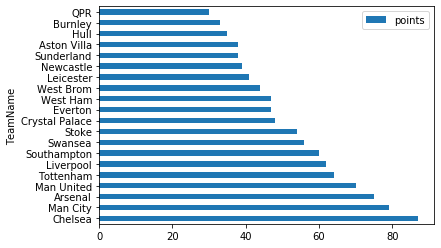

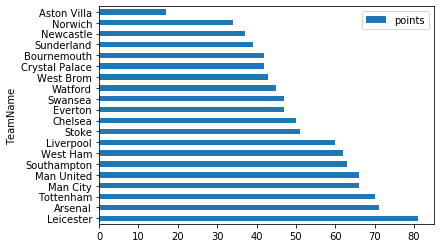

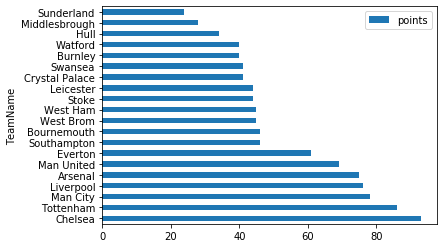

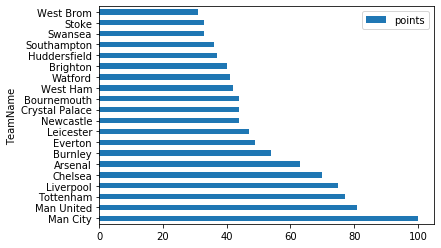

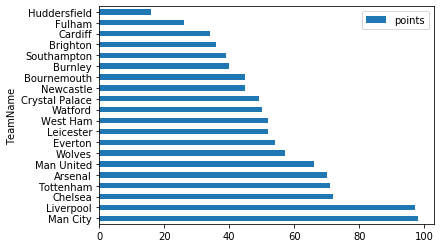

In [157]:
for season in seasons:
    season.plot('TeamName', 'points', kind = 'barh')

In [124]:
top_four_teams = []
team_standing = defaultdict(list)
for i in range(len(seasons)):
    top_four_teams.append(list(seasons[i].head(4)['TeamName']))
    count = 1
    for team in seasons[i]['TeamName']:
        team_standing[team].append(count)
        count += 1    

In [125]:
unique_top_four_teams = dict()
for i in range(len(top_four_teams)):
    for j in range(4):
        if top_four_teams[i][j] not in unique_top_four_teams:
            unique_top_four_teams[top_four_teams[i][j]] = 1
        else:
            unique_top_four_teams[top_four_teams[i][j]] += 1

In [126]:
unique_top_four_teams

{'Chelsea': 3,
 'Man City': 5,
 'Arsenal': 2,
 'Man United': 2,
 'Leicester': 1,
 'Tottenham': 4,
 'Liverpool': 3}

In [158]:
team_standing_avs = defaultdict(list)
for team in team_standing.keys():
    team_standing_avs[team].append([np.mean(team_standing[team]), np.median(team_standing[team])])

team_standing_avs

defaultdict(list,
            {'Chelsea': [[4.0, 3.0]],
             'Man City': [[2.2, 2.0]],
             'Arsenal': [[4.2, 5.0]],
             'Man United': [[4.6, 5.0]],
             'Tottenham': [[3.4, 3.0]],
             'Liverpool': [[4.8, 4.0]],
             'Southampton': [[10.8, 8.0]],
             'Swansea': [[13.25, 13.5]],
             'Stoke': [[12.25, 10.5]],
             'Crystal Palace': [[12.4, 12.0]],
             'Everton': [[9.0, 8.0]],
             'West Ham': [[10.6, 11.0]],
             'West Brom': [[14.25, 13.5]],
             'Leicester': [[9.2, 9.0]],
             'Newcastle': [[14.0, 14.0]],
             'Sunderland': [[17.666666666666668, 17.0]],
             'Aston Villa': [[18.5, 18.5]],
             'Hull': [[18.0, 18.0]],
             'Burnley': [[14.25, 15.5]],
             'QPR': [[20.0, 20.0]],
             'Watford': [[13.75, 13.5]],
             'Bournemouth': [[12.75, 13.0]],
             'Norwich': [[19.0, 19.0]],
             'Middlesbrough': [

[0.24, 0.28, 0.22, 0.26, 0.24]